In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mujoco
import mediapy as media
from xmlMake import *
from Actuator import *
from scipy.spatial.transform import Rotation as R

In [3]:
height = width = 1024
dt = 0.01

In [4]:
length = 0.3
radius = 0.05

nDisks = 20
nSegments = 3

fillRatio = 0.1
dx = length / ((nDisks + fillRatio - 1) * nSegments)

In [5]:
innerStiffness = 0
innerDamping = 10

outerStiffness = 100
outerDamping = 10

force = 10

""

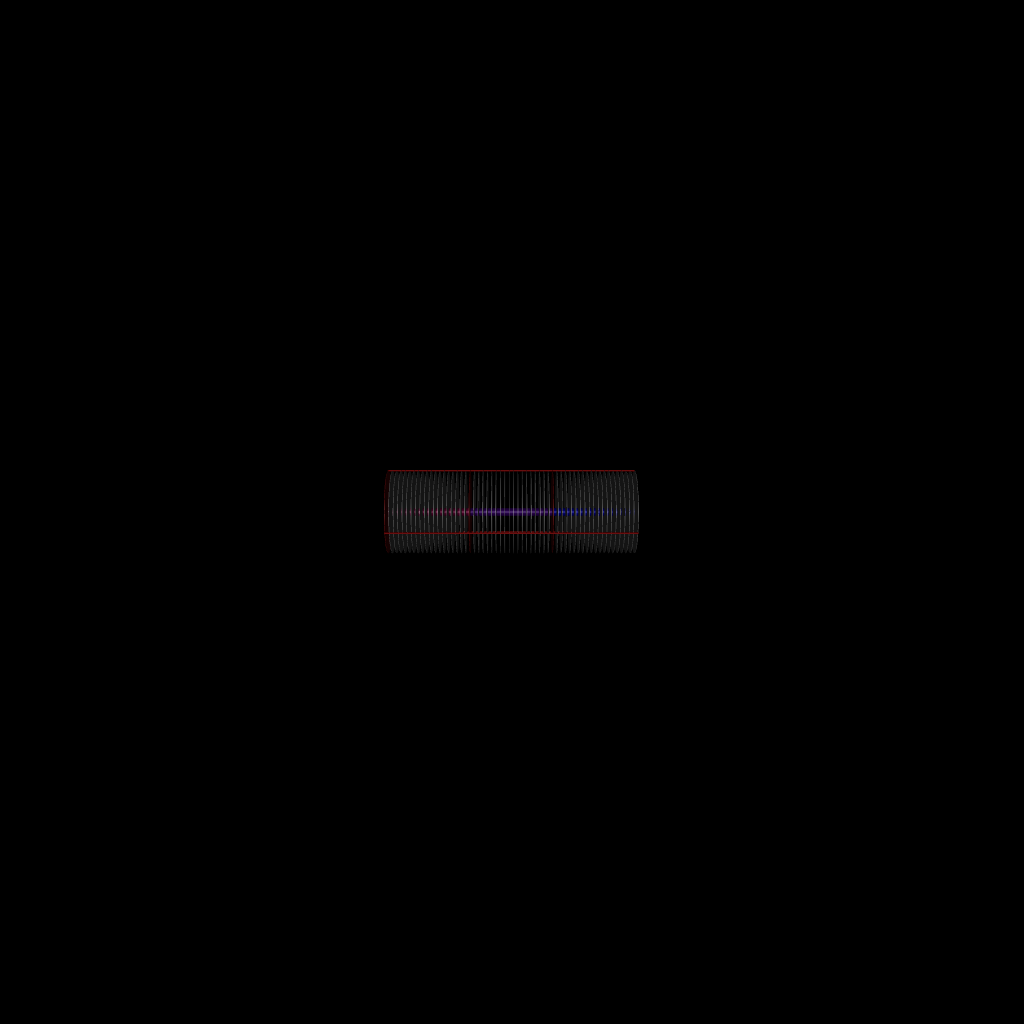

In [6]:
actuator3 = softActuator(nSegments= nSegments,
                         nDisks = nDisks,
                         length = length,
                         radius = radius,
                         innerStiffness = innerStiffness,
                         innerDamping = innerDamping,
                         outerStiffness = outerStiffness,
                         outerDamping = outerDamping,
                         gear = force,
                         mass = 0.1,
                         timeStep = dt,
                         fillRatio=fillRatio)
with mujoco.Renderer(actuator3.model, height, width) as renderer:
    renderer.update_scene(actuator3.data, camera='mainCamera')
    imRef = renderer.render()
media.show_image(imRef)

In [7]:
p1 = np.array([0.15, -0.15, 0])
o1 = np.array([[0, 1, 0],
              [-1, 0, 0],
              [0, 0, 1]])

percentage1 = calculateStiffness(p1, o1, dx, dx, dx, dx, innerStiffness, force, nDisks, radius)/outerStiffness
percentage1

array([0.15516921, 0.34409851, 0.34409851])

In [8]:
p2 = np.array([0.15, 0, -0.15])
o2 = np.array([[0, 0, -1],
              [0, 1, 0],
              [1, 0, 0]])

percentage2 = calculateStiffness(p2, o2, dx, dx, dx, dx, innerStiffness, force, nDisks, radius)/outerStiffness
percentage2

array([0.24484058, 0.48916392, 0.16315271])

In [9]:
duration = 5 # (seconds)
framerate = 60  # (fps)


# Simulate and display video.
frames = []
ii = 0
actuator3.reset()
for jj in range(3):
    actuator3.setStiffness(0, jj, percentage1[jj])
    actuator3.setStiffness(1, jj, percentage2[jj])
with mujoco.Renderer(actuator3.model, height, width) as renderer:
    while np.round(actuator3.data.time, 1-int(np.log10(dt))) <= duration:
        actuator3.step(np.array([1, 1, 0]))
        if len(frames) < actuator3.data.time * framerate:
            renderer.update_scene(actuator3.data, camera='mainCamera')
            frame = renderer.render()
            frames.append(frame)
        ii += 1

In [10]:
media.show_video(frames, fps=framerate)